In [1]:
import matplotlib.pyplot as plt
import numpy as np
from deepxde.gradients import hessian
import torch
from deepxde.geometry.geometry_1d import Interval
from deepxde.icbc.boundary_conditions import DirichletBC
from deepxde.data.pde import PDE
from deepxde.nn.pytorch.fnn import FNN
from deepxde.model import Model

In [2]:
def boundary(x, on_boundary):
    return on_boundary

In [3]:
layer_size = [1] + [50] * 3 +[1]
activation = torch.tanh
initializer = torch.nn.init.xavier_uniform_

In [4]:
def pde(x,y):
    dy_xx = hessian(y,x)
    return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)

def func(x):
    return np.sin(np.pi * x)

geom = Interval(-1, 1)
bc = DirichletBC(geom, func, boundary)
data = PDE(geom, pde, bc, 100, 2, solution=func, num_test=100)

net = FNN(layer_size, activation, initializer)

model = Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

losshistory, train_state = model.train(iterations=10000)

torch.save(net.state_dict(), 'model_omega_8.pth')

'compile' took 1.266355 s

Step      Train loss              Test loss               Test metric   
0         [4.85e+01, 1.42e-02]    [4.93e+01, 1.42e-02]    [9.27e-01]    
1000      [1.35e-03, 1.15e-06]    [9.56e-04, 1.15e-06]    [8.88e-04]    
2000      [8.24e-05, 1.26e-08]    [5.36e-05, 1.26e-08]    [1.29e-04]    
3000      [2.58e-05, 9.51e-10]    [1.60e-05, 9.51e-10]    [3.27e-05]    
4000      [1.71e-05, 3.76e-10]    [1.10e-05, 3.76e-10]    [3.28e-05]    
5000      [5.88e-05, 6.09e-06]    [4.43e-05, 6.09e-06]    [2.29e-03]    
6000      [8.65e-04, 1.35e-05]    [8.83e-04, 1.35e-05]    [3.21e-03]    
7000      [6.92e-04, 1.58e-05]    [6.86e-04, 1.58e-05]    [3.53e-03]    
8000      [3.38e-04, 1.77e-05]    [3.23e-04, 1.77e-05]    [3.12e-03]    
9000      [5.50e-04, 3.28e-05]    [5.46e-04, 3.28e-05]    [6.68e-03]    
10000     [6.82e-05, 1.09e-05]    [6.11e-05, 1.09e-05]    [3.16e-03]    

Best model at step 4000:
  train loss: 1.71e-05
  test loss: 1.10e-05
  test metric: [3.28e-05]


In [5]:
omega = 1.1

In [6]:
for _ in range(0, 69):
    
    def pde(x,y):
        dy_xx = hessian(y,x)
        return -dy_xx - omega **2 * np.pi ** 2 * torch.sin(omega * np.pi * x)
    
    def func(x):
        return np.sin(omega * np.pi * x)
    
    geom = Interval(-1, 1)
    bc = DirichletBC(geom, func, boundary)
    data = PDE(geom, pde, bc, 100, 2, solution=func, num_test=100)
    net = FNN(layer_size, activation, initializer)
    net.load_state_dict(torch.load('model_omega_8.pth'))
    model = Model(data, net)
    model.compile('adam', lr=0.001, metrics=['l2 relative error'])
    losshistory, train_state = model.train(iterations=10000)

    torch.save(net.state_dict(), 'model_omega_8.pth')
    omega += 0.1

'compile' took 0.000086 s

Step      Train loss              Test loss               Test metric   
0         [3.65e+00, 9.75e-02]    [3.44e+00, 9.75e-02]    [2.20e-01]    


1000      [3.03e-04, 7.61e-08]    [1.83e-04, 7.61e-08]    [2.65e-04]    
2000      [1.15e-04, 9.54e-09]    [8.10e-05, 9.54e-09]    [1.05e-04]    
3000      [6.74e-05, 2.51e-08]    [4.75e-05, 2.51e-08]    [1.52e-04]    
4000      [2.40e-04, 6.87e-06]    [2.27e-04, 6.87e-06]    [3.78e-03]    
5000      [7.28e-05, 2.10e-06]    [6.77e-05, 2.10e-06]    [1.30e-03]    
6000      [7.74e-05, 7.22e-07]    [6.18e-05, 7.22e-07]    [7.77e-04]    
7000      [1.88e-05, 5.13e-10]    [1.31e-05, 5.13e-10]    [3.12e-05]    
8000      [1.59e-04, 2.95e-06]    [1.50e-04, 2.95e-06]    [2.45e-03]    
9000      [1.71e-05, 1.79e-07]    [1.17e-05, 1.79e-07]    [4.82e-04]    
10000     [9.09e-05, 1.41e-06]    [7.74e-05, 1.41e-06]    [9.01e-04]    

Best model at step 9000:
  train loss: 1.73e-05
  test loss: 1.18e-05
  test metric: [4.82e-04]

'train' took 23.423121 s

'compile' took 0.000057 s

Step      Train loss              Test loss               Test metric   
0         [5.75e+00, 7.84e-02]    [5.43e+00, 7

In [7]:
from deepxde.utils.external import saveplot

Saving loss history to c:\Users\CSW\Desktop\loss.dat ...
Saving training data to c:\Users\CSW\Desktop\train.dat ...
Saving test data to c:\Users\CSW\Desktop\test.dat ...


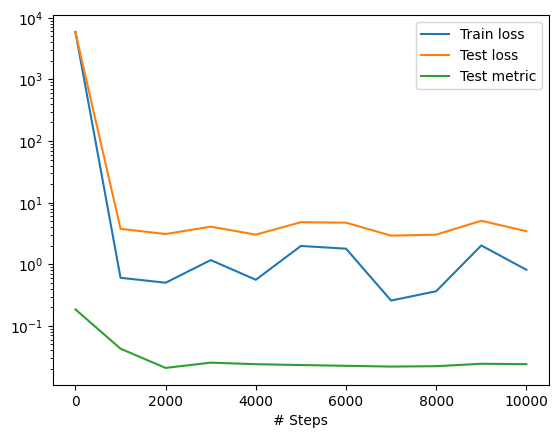

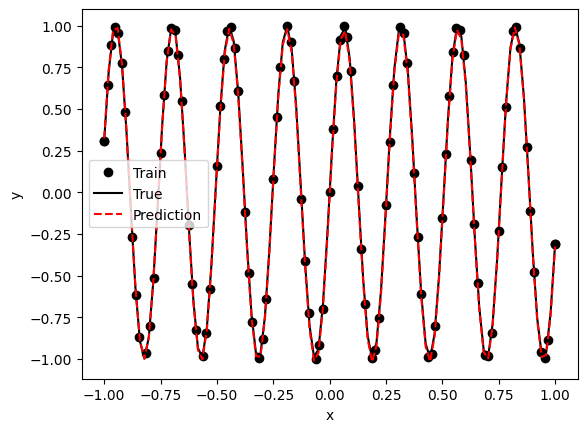

In [8]:
saveplot(losshistory, train_state, issave=True, isplot=True)